## PROJET 6: CLASSIFICATION AUTOMATIQUE DE BIENS DE CONSOMMATION

### SOMMAIRE

PARTIE I: EXTRACTION FEATURES DES DONNEES TEXTES

PARTIE II: EXTRACTION FEATURES DES DONNEES IMAGES

PARTIE III: DATA AUGMENTATION, CLASSICIFICATION SUPERVISEE

PARTIE IV: CONCEPT D'UNE TECHNIQUE RECENTE ET SCRIPT PYTHON

INTRODUCTION

.....

### PARTIE I: EXTRACTION FEATURES DES DONNEES TEXTES

les librairies 

In [1]:
# les librairies 
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### a) <b>lecture fichier

In [2]:
# fonction lecture fichier csv
def read_csv(path_file):
    return pd.read_csv(path_file)

In [3]:
# lecture du df et affichage des cinq premières lignes
df=read_csv(r"/Users/saidali_bacar/Documents/projets openclassrooms/projet 6/data/flipkart_com-ecommerce_sample_1050.csv")
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

<b>les infos du fichier

In [4]:
# fonction affichage des infos fichier csv
def info_csv (filename):
    return pd.DataFrame.info(filename)
info_csv(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

<b>résumé du fichier 

fichier de type csv 

1050 colonnes et 15 variables, 12 catégorielles, 2 numériques et 1 booléenne. 

une variable qui va nous intéresser particulièrement ici est la variable "description"

<b>les valeurs manquantes 

<Axes: >

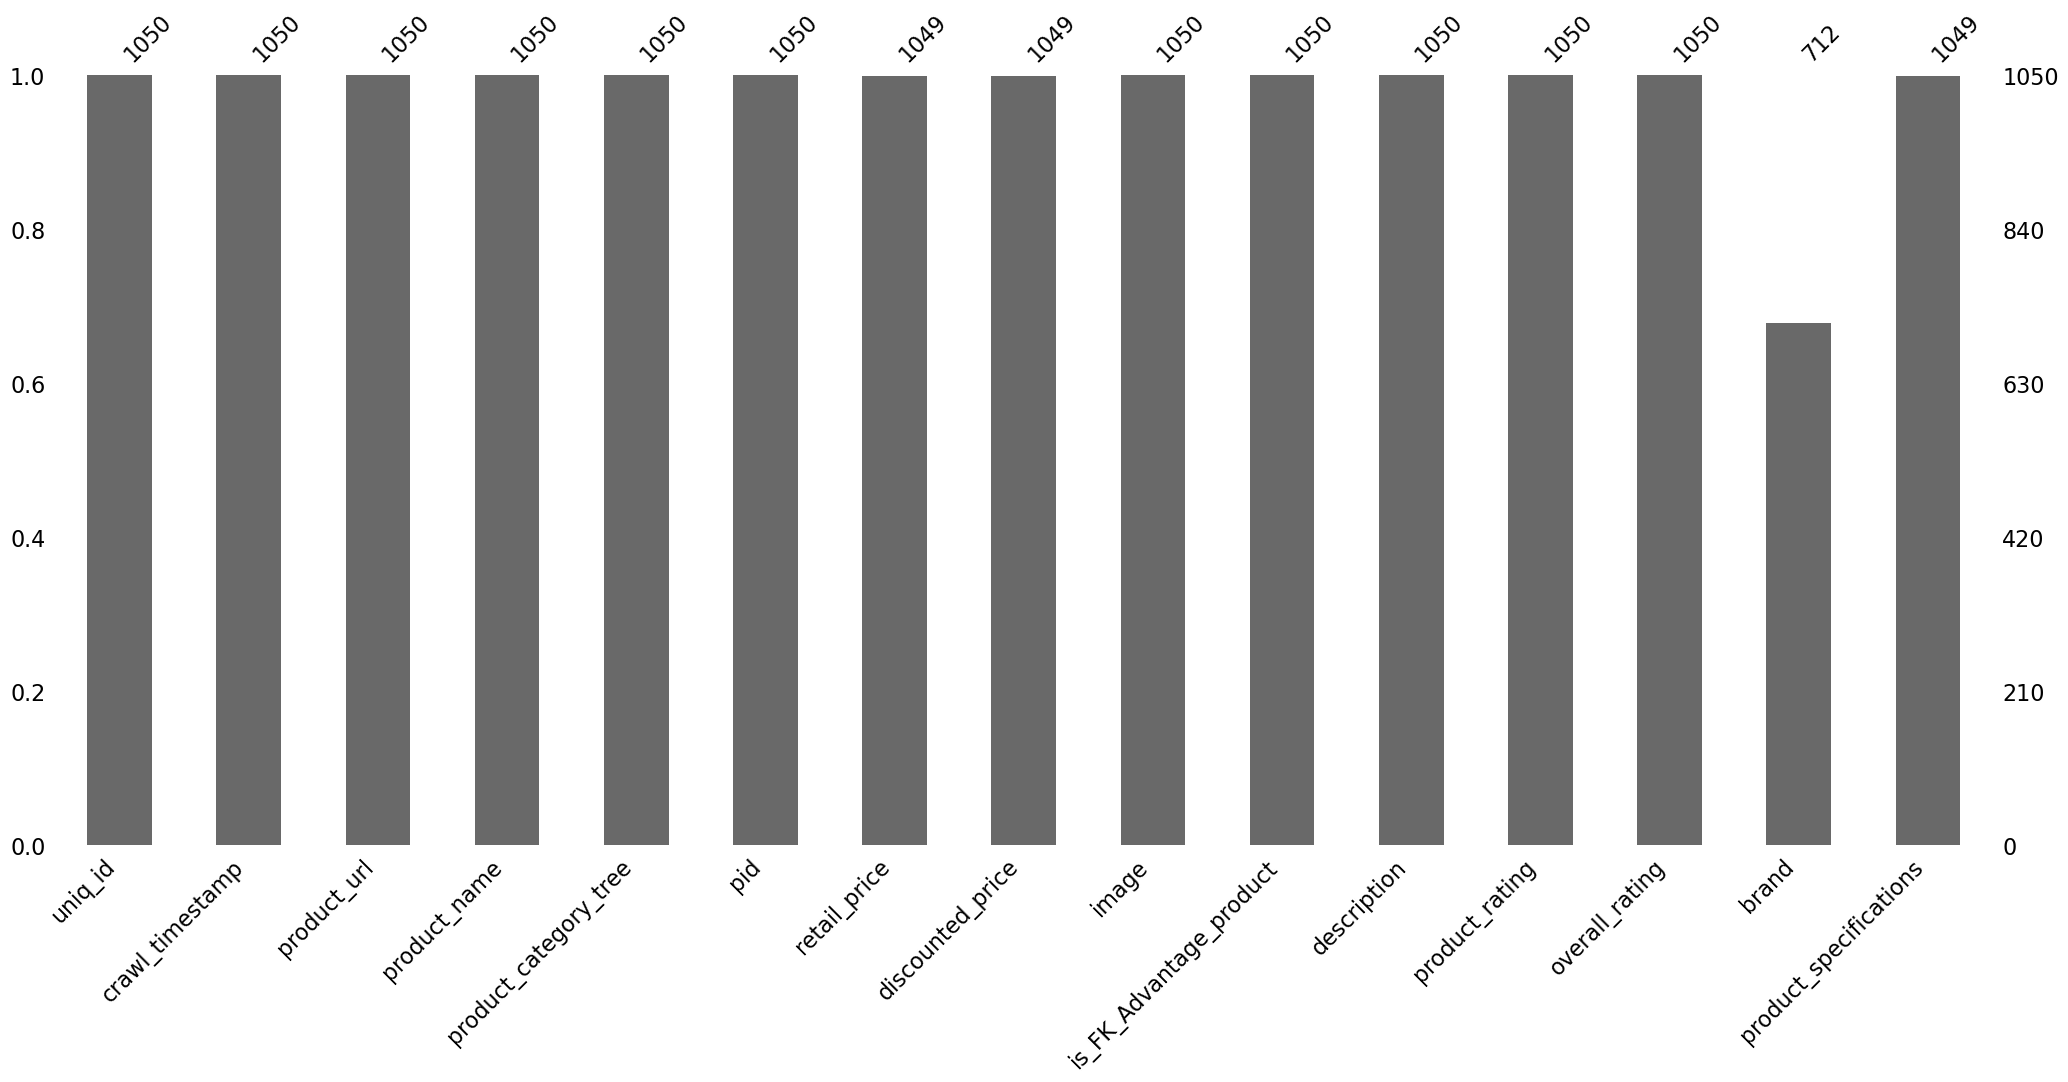

In [5]:
# fonction contrôle des valeurs manquantes 1ère méthode (graphique)
# vue générale avec missingno 
def mis_val_chart(data):
    return msno.bar(data)
mis_val_chart(df)

In [6]:
# les valeurs manquantes 2ème méthode (df)
def mis_val(data):
    total_mis_val=data.isnull().sum().sort_values(ascending=False)
    percentage_mis_val=round(total_mis_val/data.shape[0]*100,2)
    return pd.concat([total_mis_val,percentage_mis_val],axis=1,keys=['total_mis_val','percentage_mis_val'])
mis_val(df)

total_mis_val  percentage_mis_val
brand                              338               32.19
retail_price                         1                0.10
discounted_price                     1                0.10
product_specifications               1                0.10
uniq_id                              0                0.00
crawl_timestamp                      0                0.00
product_url                          0                0.00
product_name                         0                0.00
product_category_tree                0                0.00
pid                                  0                0.00
image                                0                0.00
is_FK_Advantage_product              0                0.00
description                          0                0.00
product_rating                       0                0.00
overall_rating                       0                0.00

trois variables sont conercées ici par des valeurs manquantes

"brand" avec 32% de valeurs manquantes, traitement: plus d'investigation

"retail_price" et "discounted_price" avec 0.1% de valeurs manquantes, traitement: suppression 

<b>les doublons

In [7]:
# contrôle des doublons par clé 
def check_duplicate(data,subset="colname"):
    return pd.DataFrame.duplicated(data).sum()
check_duplicate(df,subset=["uniq_id"])

0

pas de doublon dans le fichier

<b>compréhension des variables 

les variables 

- "unique id": identifiant unique du vendeur qui poste un produit le site marketplace

- "crawl_timestamp": date et heure d'enregistrement du produit 

- "product_url": adresse web produit

- "product_name": nom du produit

- "product_category_tree": arborescence produit

- "pid": product id 

- "retail_price": prix du produit

- "discount_price": montant de la remise sur le produit, solde 

- "image": image associé au produit

- "is_FK_Advantage_product": ???

- "description": description du produit

- "product_rating": evaluation du produit, semble avoir peu de renseignement

- "overall_rating": evaluation globale, semble avoir peu de renseignement

- "brand": marque 

- "product_specifications": spéciafications sur le produit

<b>les variables numeriques 

In [8]:
# fonction afficher histogramme, courbe de densité et boite à moustaches. 
def plot_uni_var(df, colname):
    # initialisation graphe avec 3 subplots
    fig, ax = plt.subplots(1, 3, figsize=(10, 6))

    # ajout espacement entre les graphiques
    plt.subplots_adjust(wspace=0.5) 

    # histplot
    sns.histplot(data=df,x=df[colname], ax=ax[0], color='b')
    ax[0].set_xlabel(colname)

    # kdeplot(courbe de densité)
    sns.distplot(df,x=df[colname], ax=ax[1], color='b',kde=True)
    ax[1].set_xlabel(colname)


    # boxplot
    sns.boxplot(data=df,y=df[colname], ax=ax[2], color='b')
    ax[2].set_xlabel(colname)

    plt.show()

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/3976353548.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,x=df[colname], ax=ax[1], color='b',kde=True)


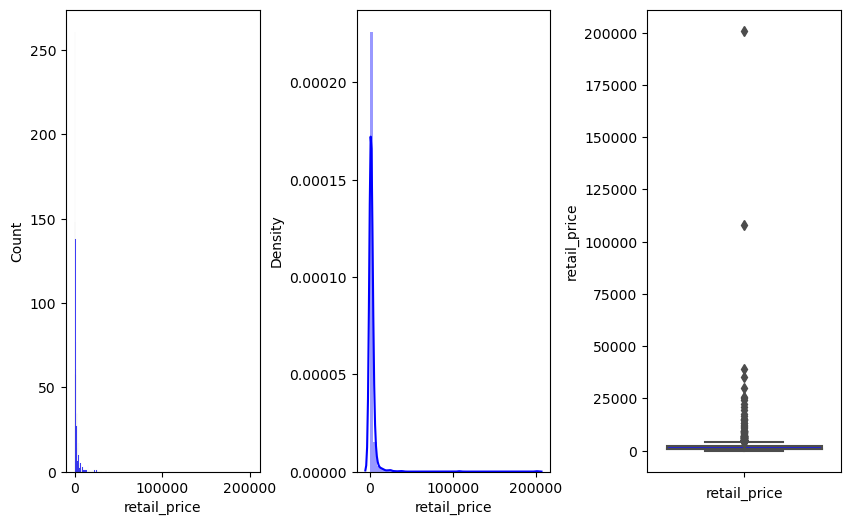

None


/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/3976353548.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,x=df[colname], ax=ax[1], color='b',kde=True)


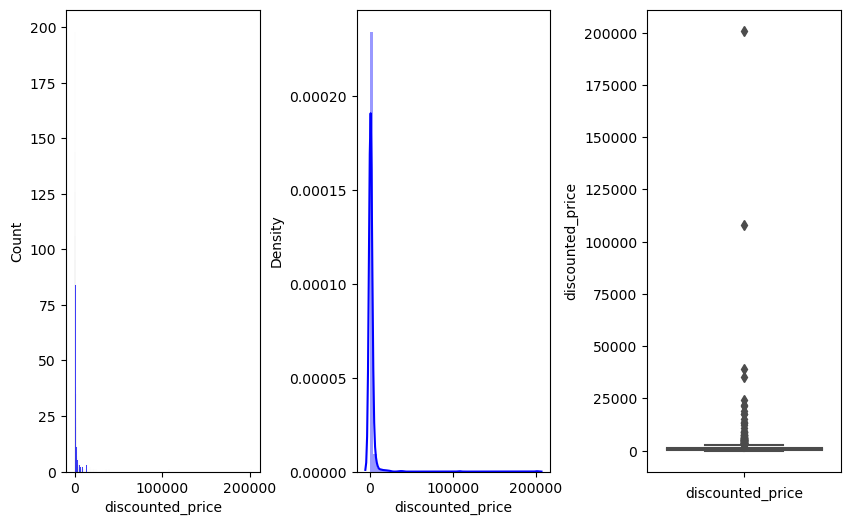

None


In [9]:
print(plot_uni_var(df, "retail_price"))
print(plot_uni_var(df, "discounted_price"))

zoom sur les boxplots

In [10]:
df[df["retail_price"]<50000]["retail_price"]

0        1899.0
1         600.0
3        2699.0
4        2599.0
5       24400.0
         ...   
1045     1399.0
1046     4930.0
1047     4500.0
1048     3465.0
1049     1190.0
Name: retail_price, Length: 1047, dtype: float64

<Axes: >

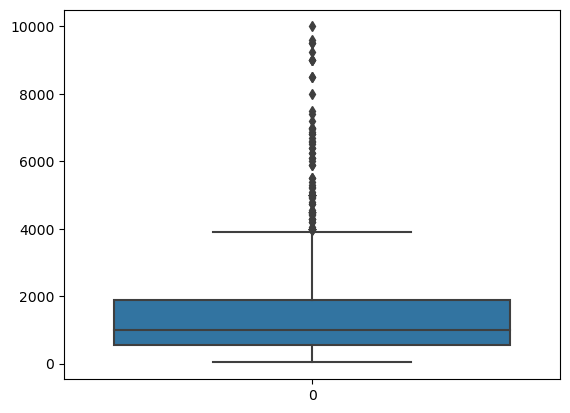

In [11]:
sns.boxplot(df[df["retail_price"]<10000]["retail_price"])

<Axes: >

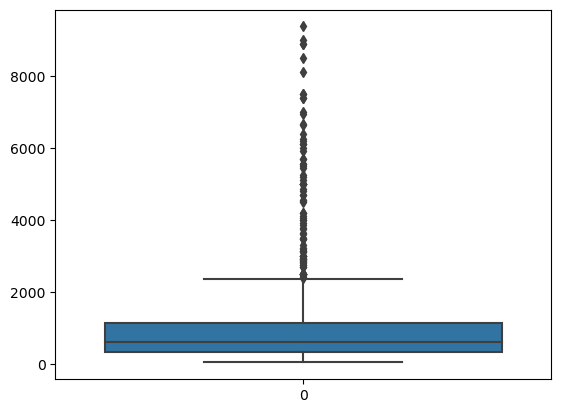

In [12]:
sns.boxplot(df[df["discounted_price"]<10000]["discounted_price"])

les paramètres statistiques classiques 

In [13]:
df.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

NETTOYAGE DU TEXTE

les principales etapes qui seront abordees ici sont:
- tokenisation
- stop words 
- ponctuation
- stemming
- lemmatisation 

la variable qui va nous interesser ici  la variable "description"

In [14]:
# les librairies 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import punkt
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
#nltk.download('punkt') # les outils necessaires pour faire la tokenisation
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('stopwords')

### b) preparation variable 

In [16]:
# df["description"] # la variable 

In [17]:
# Check de la longueur des descriptions produits.
description_length = []

for i in df['description']:
    description_length.append(len(i))

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/2225174725.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(description_length, color='blue')


<Axes: title={'center': 'Boxplot (taille des descriptions produits)'}, xlabel='Longueur de la description'>

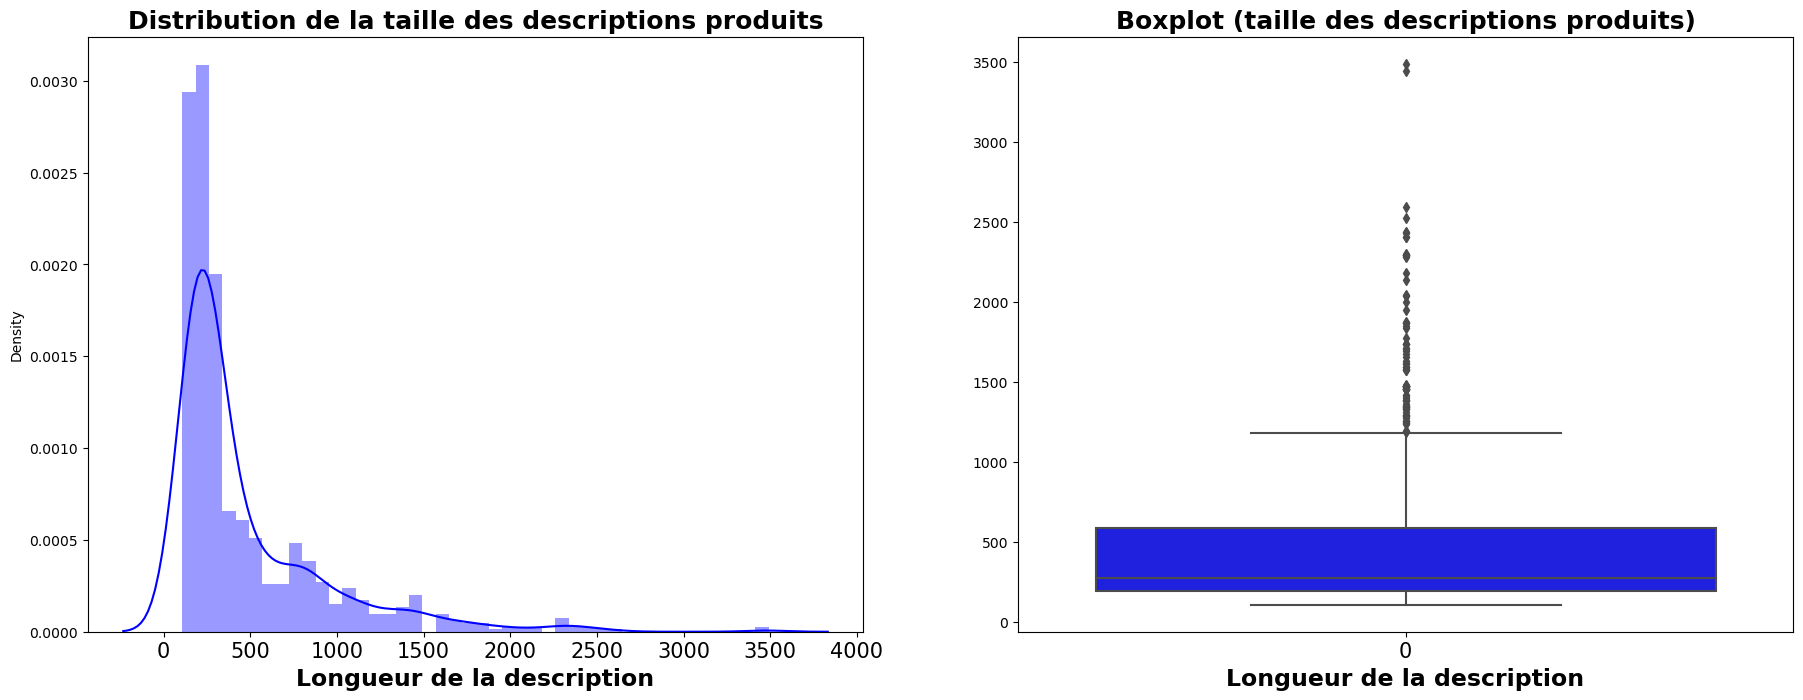

In [18]:
plt.figure(figsize = (22, 17))

plt.subplot(2, 2, 1)
plt.xticks(size = 15)
plt.xlabel('Longueur de la description', weight='bold', size=17)
plt.title('Distribution de la taille des descriptions produits',size = 18, weight = 'bold')
sns.distplot(description_length, color='blue')

plt.subplot(2, 2, 2)
plt.xticks(size = 15)
plt.xlabel('Longueur de la description', weight='bold', size=17)
plt.title('Boxplot (taille des descriptions produits)',size = 18, weight = 'bold')
sns.boxplot(description_length, color='blue')

In [19]:
sentence = df["description"].str.cat(sep=" ") # fonction str.cat pour extraire l'ensemble des descriptions 
#print(sentence)

tokenisation

In [20]:
def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

In [21]:
word_tokens = tokenizer_fct(sentence)
# word_tokens

stop words

In [22]:
# Stop words
def stop_word_filter_fct(list_words) :
    stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']
    filtered_w = [w.lower() for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

In [23]:
sw = stop_word_filter_fct(word_tokens)
# sw

lower case and alpha

In [24]:
# lower case, alpha and ponctuations
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    lw1 = [w.lower() for w in lw if w.isalpha()]
    return lw1

In [25]:
lw = lower_start_fct(sw)
# lw

lemmatisation

In [26]:
# Lemmatizer (base d'un mot, racine d'un mot)
def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

In [27]:
lem_w = lemma_fct(lw)
# lem_w

bonus: les mots les plus frequents

In [28]:
def most_freq_word_func(text, n_words=5):
    '''
    Returns the most frequently used words from a text
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        List of the most frequently occurring words (by default = 5)
    ''' 
    
    fdist = FreqDist(lem_w) 
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
    
    n_words = n_words
    most_freq_words_list = list(df_fdist['Word'][0:n_words])
    
    return most_freq_words_list, 

In [29]:
# most_freq_word_func(lem_w, 15) # les 50 mots les plus communs 

In [30]:
fdist = FreqDist(lem_w) # data frame des mots les plus communs avec leur fréquence 
    
df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
df_fdist

Word  Frequency
128     product        863
216        only        718
223        free        617
81          for        611
213         buy        581
...         ...        ...
862   insulated          1
864        jute          1
2519      drama          1
2522    toddler          1
3203       keya          1

[4415 rows x 2 columns]

affichage graphique

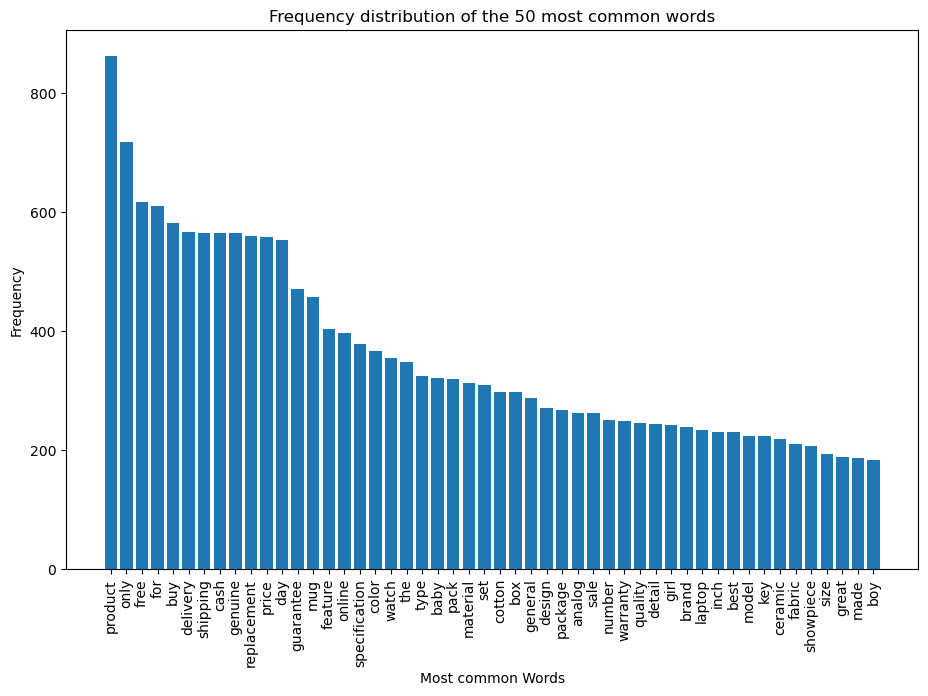

In [31]:
plt.figure(figsize=(11,7)) # graphique des 50 mots les plus fréquents 
plt.bar(df_fdist.iloc[0:50]['Word'], 
        df_fdist.iloc[0:50]['Frequency'])

plt.xticks(rotation = 90)

plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 50 most common words")

plt.show()

### <b>c) bag of words

what is bag of words? 

The bag of words model is a technique used in natural language processing (NLP) to represent text data as a set of numerical features. In this model, each document or piece of text is represented as a "bag" of words, with each word in the text represented by a separate feature or dimension in the resulting vector. The value of each feature is determined by the number of times the corresponding word appears in the text.

The bag of words model is useful in NLP because it allows us to analyze text data using machine learning algorithms, which typically require numerical input. By representing text data as numerical features, we can train machine learning models to classify text or analyze sentiments. 

In [32]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

la cible

In [33]:
# df["product_category_tree"]

In [34]:
df["product_category"] = [df["product_category_tree"][index][2:(df["product_category_tree"][index].find(">"))] for index in range(len(df))]
print(set(df["product_category"]))
print(len(set(df["product_category"] )))

{'Computers ', 'Watches ', 'Kitchen & Dining ', 'Home Decor & Festive Needs ', 'Beauty and Personal Care ', 'Home Furnishing ', 'Baby Care '}
7


ci dessus les 7 catégories de produit sur le vendus le site de marketplace en ligne 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Baby Care '),
  Text(1, 0, 'Beauty and Personal Care '),
  Text(2, 0, 'Computers '),
  Text(3, 0, 'Home Decor & Festive Needs '),
  Text(4, 0, 'Home Furnishing '),
  Text(5, 0, 'Kitchen & Dining '),
  Text(6, 0, 'Watches ')])

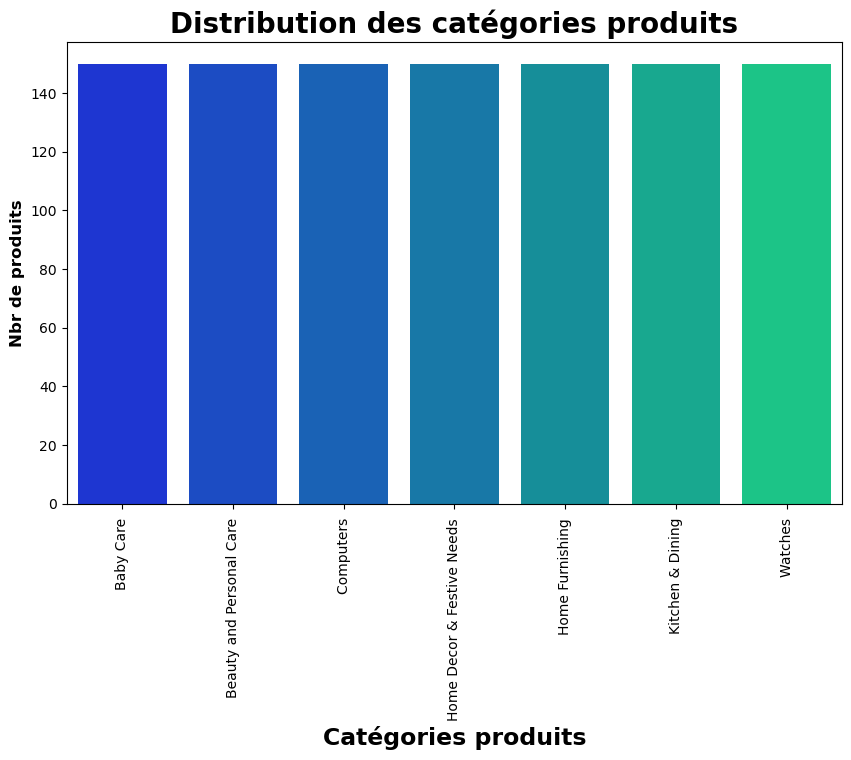

In [35]:
# Compte des catégories produits (de niveau 1) sur le dataset.
fig = plt.figure(figsize=(10,6))
plt.title('Distribution des catégories produits', weight='bold', size=20)
ax = sns.barplot(x=df.groupby('product_category').size().index, 
            y=df.groupby('product_category').size(), 
            palette='winter')
plt.xlabel('Catégories produits', weight='bold', size=17)
plt.ylabel('Nbr de produits', weight='bold', size=12)
plt.xticks(rotation = 90)

les categories de niveau 2

In [36]:
def get_categ2(L):
    
    """
    Cette fonction permet de retourner la catégorie du produit (de niveau 2) dont on donne le category_tree L en entrée.
    
    """
    c = 0
    
    split_tree = str.split(L[2:])
    categ = ''
    
    for i in split_tree:
        if i == '>>':
            c+=1
        
        if c == 2:
            break
            
        if c == 1 :     
            categ+='{} '.format(i)
    
    size = len(categ) - 1
    
    return categ[3:size]  

In [37]:
df['product_category2'] = df['product_category_tree'].apply(lambda x : get_categ2(x))

Text(0, 0.5, 'Nbr de produits')

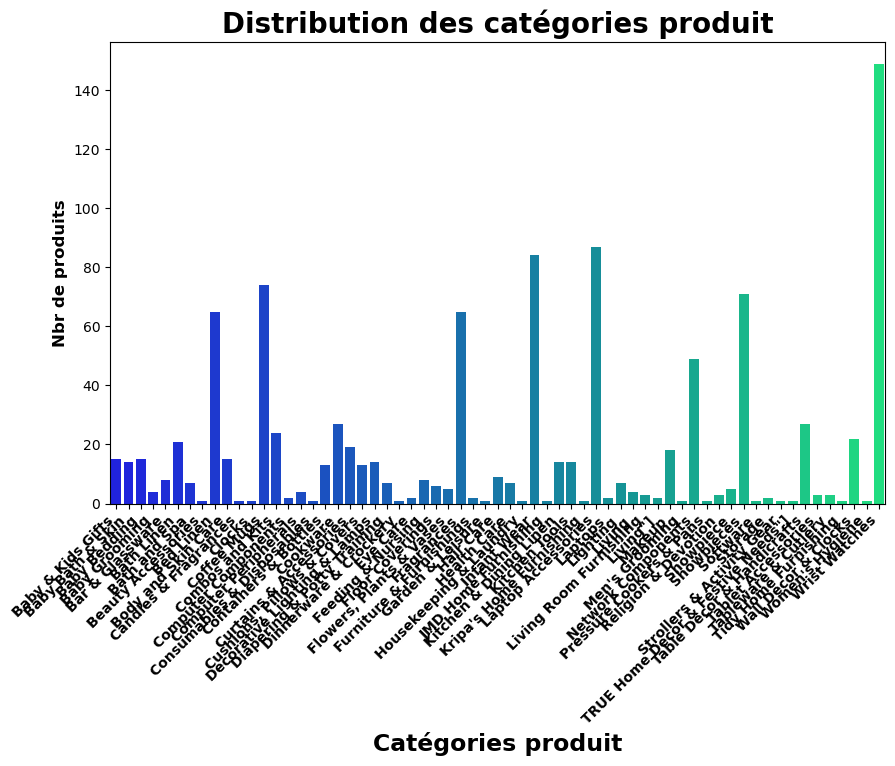

In [38]:
# Compte des catégories produits (de niveau 2) sur le dataset.
fig = plt.figure(figsize=(10,6))
plt.title('Distribution des catégories produit', weight='bold', size=20)
plt.xticks(rotation = 45, ha = 'right', size = 10, weight = 'bold')
sns.barplot(x=df.groupby('product_category2').size().index, 
            y=df.groupby('product_category2').size(), 
            palette='winter')
plt.xlabel('Catégories produit', weight='bold', size=17)
plt.ylabel('Nbr de produits', weight='bold', size=12)

les categories transformees en numerique 

In [39]:
l_cat = list(set(df["product_category"]))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]["product_category"])) for i in range(len(df))]
#y_cat_num

catégories :  ['Computers ', 'Watches ', 'Kitchen & Dining ', 'Home Decor & Festive Needs ', 'Beauty and Personal Care ', 'Home Furnishing ', 'Baby Care ']


In [40]:
df["cat_num"] = [(l_cat.index(df.iloc[i]["product_category"])) for i in range(len(df))]
#df["cat_num"]

preparation du texte pour le bag of words 

In [41]:
# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

les fonctions communes 

In [42]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [43]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

preparation sentences 

### c1) <b>countvectorizer

In [44]:
df["sentence_bow_lem"] = df["description"].apply(lambda x : transform_bow_lem_fct(x))

In [45]:
# création du bag of words (CountVectorizer)
# max_df and min_df, document_frequency and threshold

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df[feat])

cv_transform = cvect.transform(df[feat])  

exectution du modele 

In [46]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)

CountVectorizer : 
-----------------
ARI :  0.4092 time :  4.0


graphiques

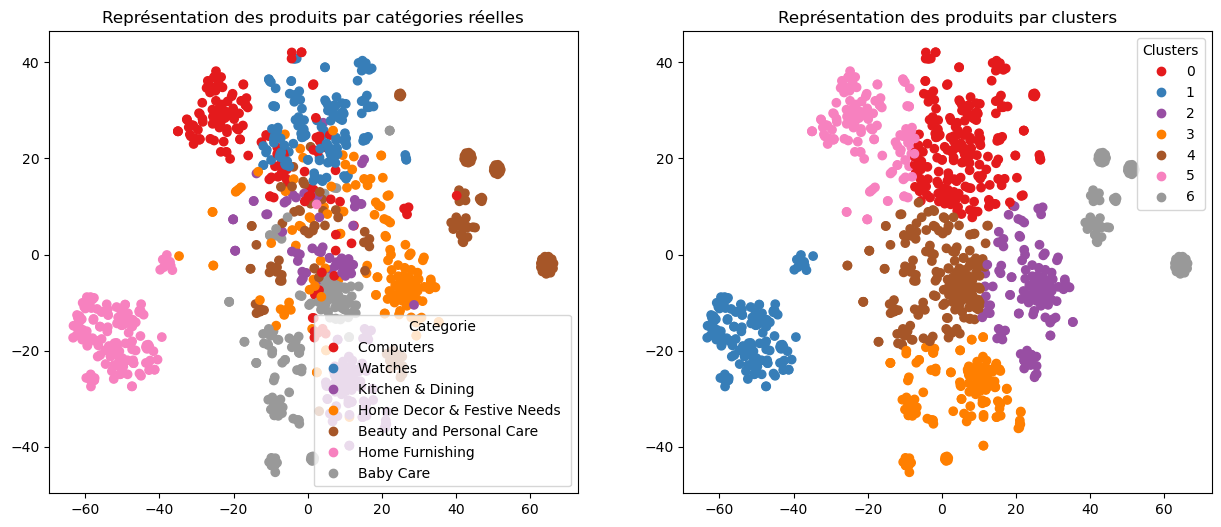

ARI :  0.4092


In [47]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### c2) <b>tfidf vectorizer

In [48]:
# création du bag of words (Tf-idf)

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
ctf_fit = ctf.fit(df[feat])
 
ctf_transform = ctf.transform(df[feat])  

In [49]:
ctf_transform

<1050x4240 sparse matrix of type '<class 'numpy.float64'>'
	with 30875 stored elements in Compressed Sparse Row format>

In [50]:
# les features textes issus du tf-idf vectoriser 
X_NLP = ctf_transform

In [51]:
X_NLP = cv_transform.toarray()

In [52]:
# sauvegarde de la matrice pour l'approche combinee 
#np.save('X_NLP.csv', X_NLP)

execution du modele

In [53]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.5281 time :  4.0


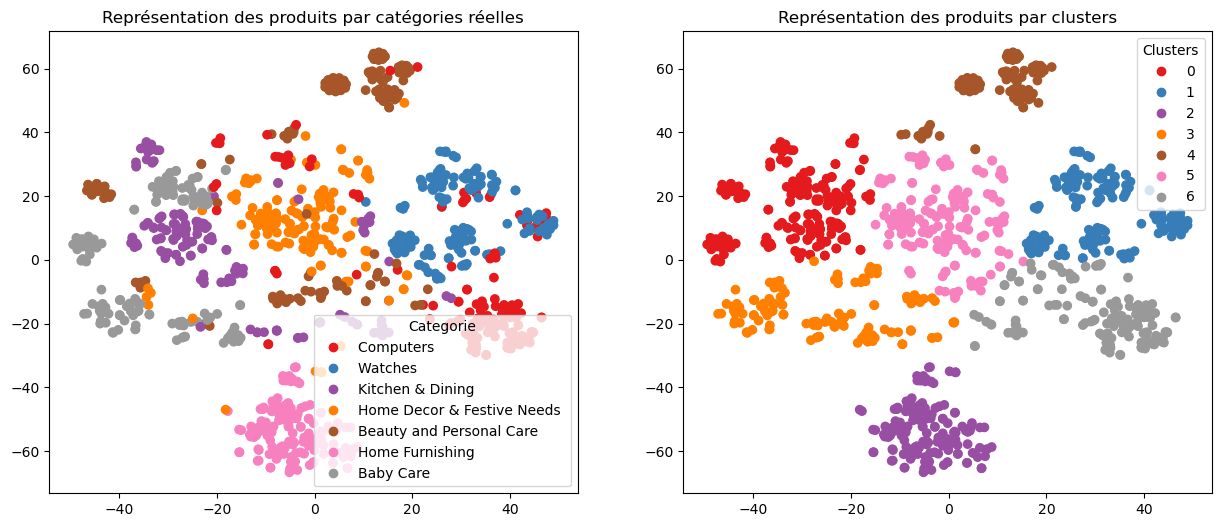

ARI :  0.5281


In [54]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

autre essai  possible faire une pca avant la tsne ou une lda avant la tsne

### c3) <b>word2vec

word2vec and parameters 

https://radimrehurek.com/gensim/models/word2vec.html

In [55]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

creation du modele 

In [56]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df["sentence_bow_lem"].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [57]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4412
Word2Vec trained


In [58]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4413


creation de la matrice d'embedding

In [59]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4413, 300)


creation du modele d'embedding

In [60]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1323900   
                                                                 
 global_average_pooling1d (  (None, 300)               0         
 GlobalAveragePooling1D)                                         
                                                                 
Total params: 1323900 (5.05 MB)
Trainable params: 1323900 (5.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


execution du modele 

In [61]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 337us/step


(1050, 300)

In [62]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3095 time :  3.0


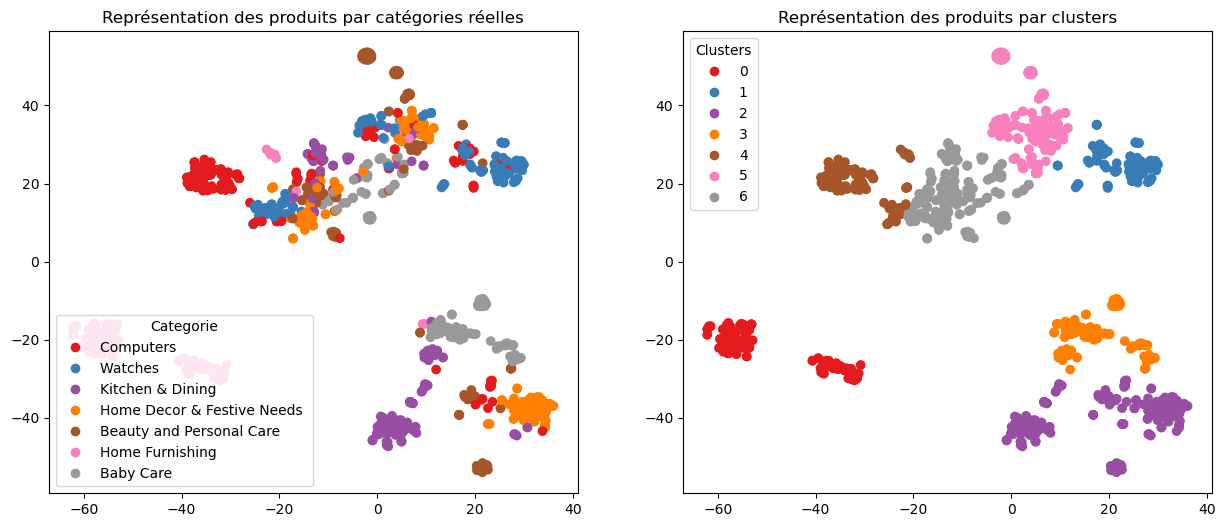

ARI :  0.3095


In [63]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### c4) <b>bert huggins face

architecture bert

tramformers, encoders uniquement 

https://medium.com/@butonnico/larchitecture-de-bert-f2528d4ed627

In [64]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import AutoTokenizer, AutoModel, TFAutoModel
#from transformers import * one module cannot found
os.environ["TF_KERAS"]='1'

preparation de texte

In [65]:
# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [66]:
df["sentence_dl"] = df["description"].apply(lambda x : transform_dl_fct(x))

In [67]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.15.0
2.15.0
Num GPUs Available:  0
False


les fonctions communes 

In [68]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
        
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [69]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state
            
        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

bert HuggingFace

'bert-base-uncased'

In [70]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df["sentence_dl"].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [71]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 254ms/step
temps traitement :  30.0


In [72]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3335 time :  3.0


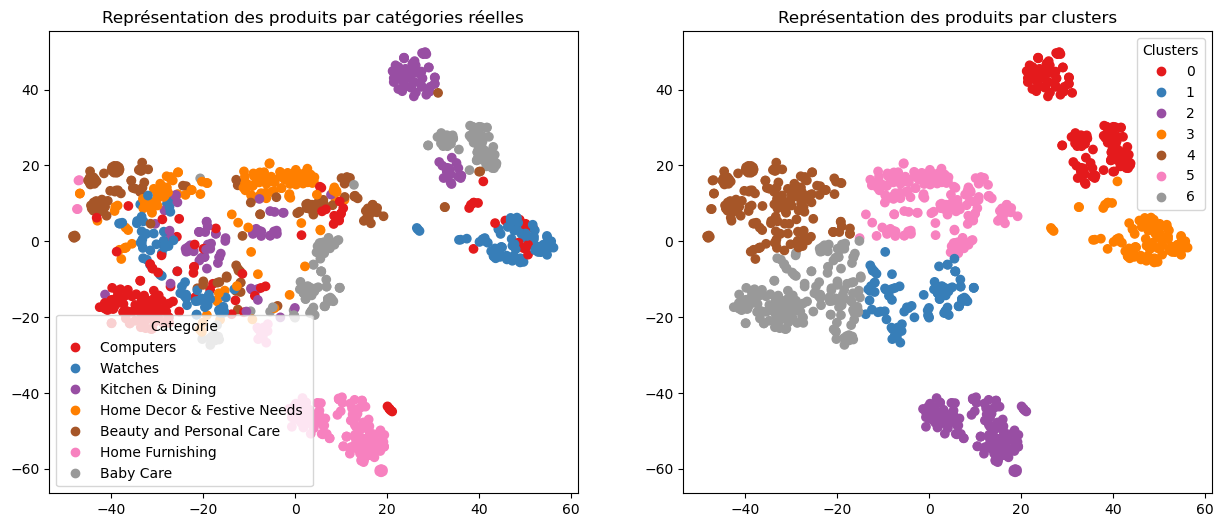

ARI :  0.3335


In [73]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### c5) bert  'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [74]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
sentences = df["sentence_dl"].to_list()

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [75]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 280ms/step
temps traitement :  33.0


In [76]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2735 time :  3.0


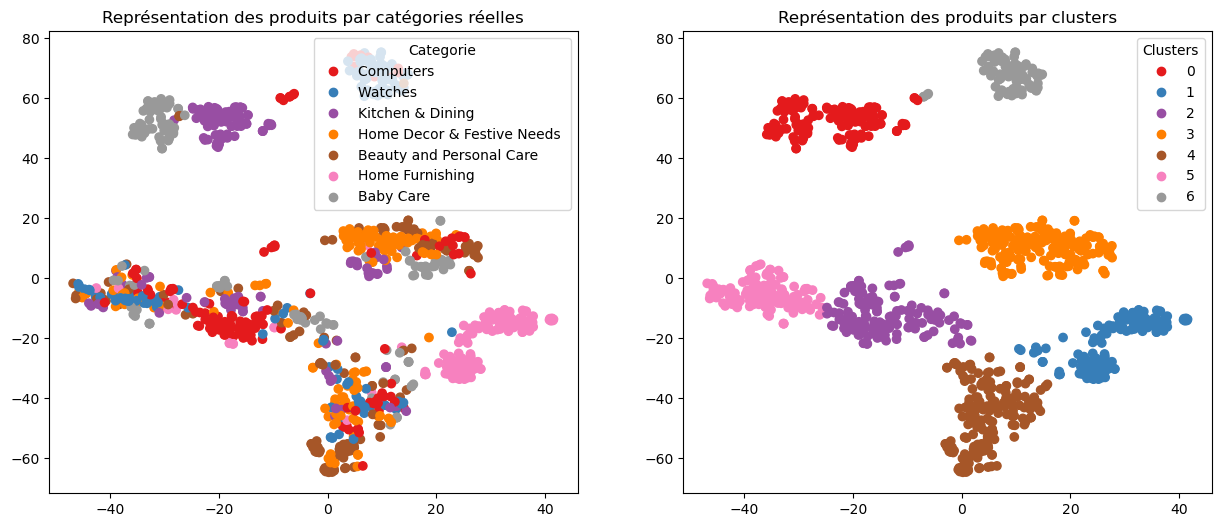

ARI :  0.2735


In [77]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### c6) USE - Universal Sentence Encoder

use

https://heartbeat.comet.ml/introduction-to-googles-universal-sentence-encoder-a-state-of-art-model-377c025afaca

In [78]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

In [79]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.15.0
2.15.0
Num GPUs Available:  0
False


In [80]:
#!pip install tensorflow-hub

In [81]:
#!pip install --upgrade tensorflow tensorflow-hub

````python
# specification d'un nouveau cache_dir
import shutil

# Specify a different cache directory or remove the existing one
cache_dir = "C:/Users/Natacha/AppData/Local/Temp/tfhub_cache"
shutil.rmtree(cache_dir, ignore_errors=True)

# Set a new cache directory
os.environ["TFHUB_CACHE_DIR"] = "C:/Users/Natacha/AppData/Local/Temp/new_tfhub_cache"

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
````

In [82]:
import os
import tensorflow_hub as hub

# Set the TFHUB_CACHE_DIR to a local directory
os.environ["TFHUB_CACHE_DIR"] = "C:/Users/Natacha/AppData/Local/Temp/new_tfhub_cache"

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [83]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [84]:
batch_size = 10
sentences = df["sentence_dl"].to_list()

In [85]:
features_USE = feature_USE_fct(sentences, batch_size)

In [86]:
features_USE.shape

(1050, 512)

In [87]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4351 time :  3.0


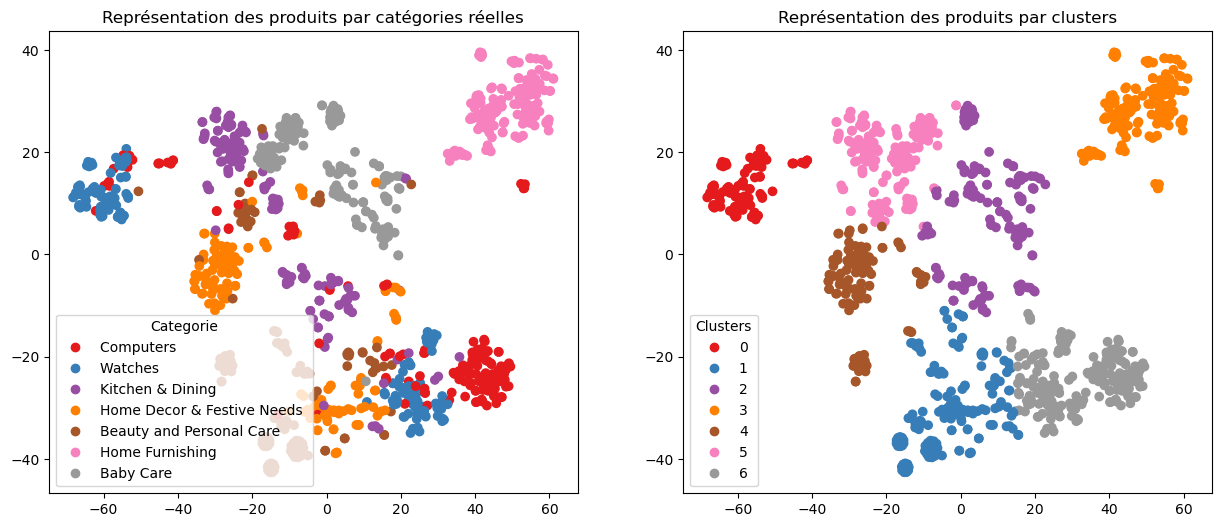

ARI :  0.4351


In [88]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Plusieurs possibilités d'amélioration dans cette partie 

CountVectorizer 

- SVD puis TSNE
- PCA puis TSNE
- LDA puis TSNE

Tfidf vectorizer
- SVD puis TSNE

### count vectorizer

### truncated SVD puis TSNE

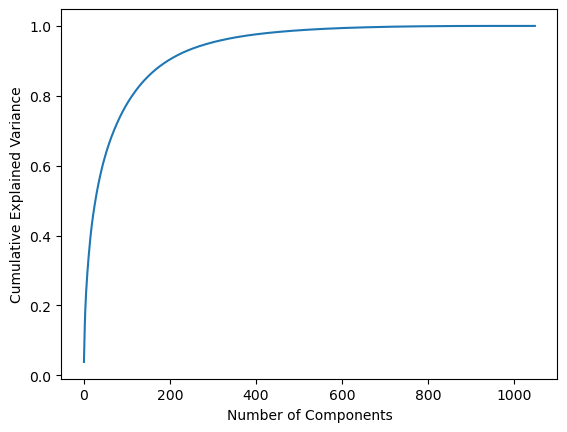

Optimal number of components: 291


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer with specified parameters
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Assume 'sentence_bow_lem' is the column containing text data
feat = 'sentence_bow_lem'

# Fit and transform the CountVectorizer
cv_transform = cvect.fit_transform(df[feat])

# Use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=min(cv_transform.shape)-1)
feat_svd = svd.fit_transform(cv_transform)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)

# Elbow plot
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components
desired_variance = 0.95  # Adjust as needed
optimal_n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print("Optimal number of components:", optimal_n_components)

execution du model

In [90]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(feat_svd)

CountVectorizer : 
-----------------
ARI :  0.4506 time :  4.0


affichage graphique

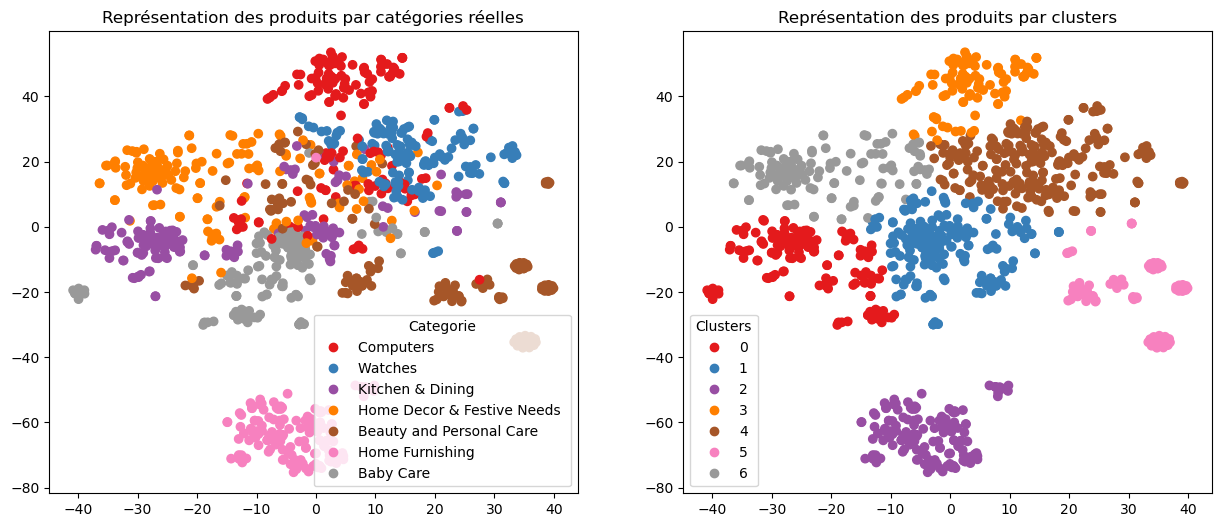

ARI :  0.4506


In [91]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### PCA puis TSNE

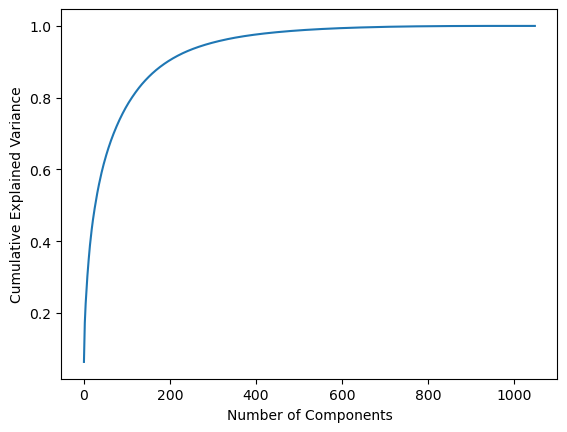

Optimal number of components: 291


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer with specified parameters
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Assume 'sentence_bow_lem' is the column containing text data
feat = 'sentence_bow_lem'

# Fit and transform the CountVectorizer
cv_transform = cvect.fit_transform(df[feat])

# Convert the sparse matrix to a dense matrix
dense_cv_transform = cv_transform.toarray()

# Use PCA for dimensionality reduction on dense matrix
pca = PCA()
feat_pca = pca.fit_transform(dense_cv_transform)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Elbow plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components
desired_variance = 0.95  # Adjust as needed
optimal_n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print("Optimal number of components:", optimal_n_components)

execution du model

In [93]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(feat_pca)

CountVectorizer : 
-----------------
ARI :  0.4353 time :  4.0


graphique

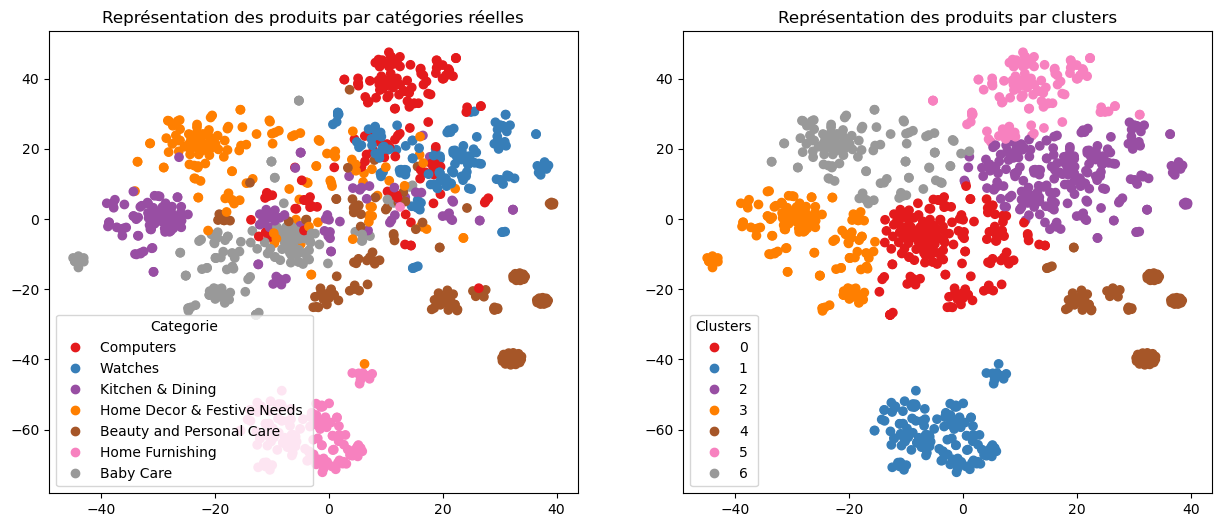

ARI :  0.4353


In [94]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### LDA puis TSNE

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer with specified parameters
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Assume 'sentence_bow_lem' is the column containing text data
feat = 'sentence_bow_lem'

# Fit and transform the CountVectorizer
cv_transform = cvect.fit_transform(df[feat])

# Number of topics to extract
n_topics = 5  # Adjust as needed

# Use LDA for topic modeling
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
feat_lda = lda.fit_transform(cv_transform)

# Display the top words for each topic
feature_names = cvect.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: product, free, delivery, shipping, genuine, cash, buy, replacement, day, guarantee
Topic #2: watch, analog, product, men, free, day, india, guarantee, delivery, replacement
Topic #3: baby, cotton, girl, color, fabric, specification, general, pack, feature, box
Topic #4: mug, home, coffee, color, material, price, ceramic, feature, quality, design
Topic #5: mug, towel, price, sticker, design, wall, perfect, bring, quality, water


execution du model 

In [96]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(feat_lda)

CountVectorizer : 
-----------------
ARI :  0.2022 time :  3.0


graphique

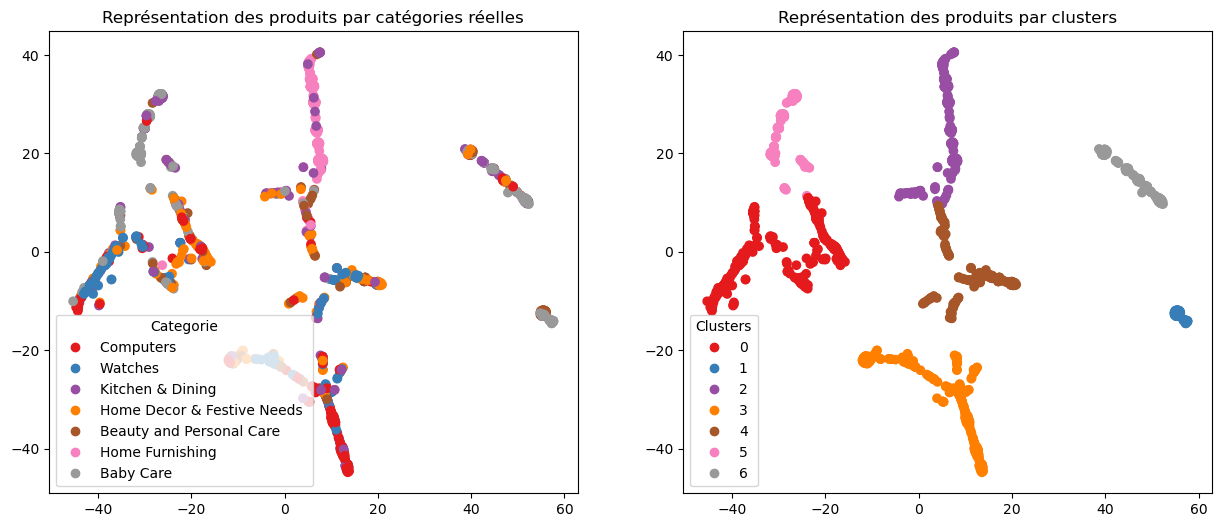

ARI :  0.2022


In [97]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### tfidf vectorizer

### truncated SVD puis TSNE

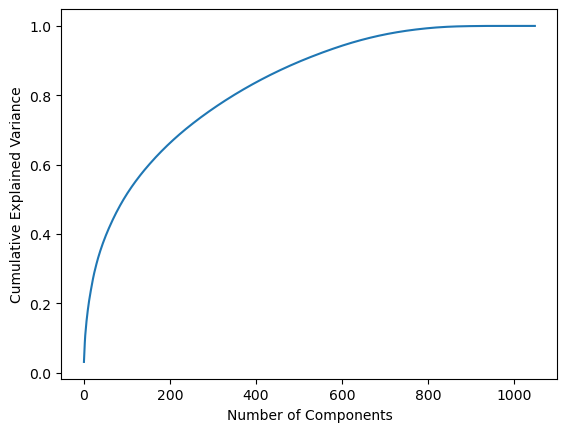

Optimal number of components: 620


In [98]:
# Create a CountVectorizer with specified parameters
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

# Assume 'sentence_bow_lem' is the column containing text data
feat = 'sentence_bow_lem'

# Fit and transform the TfidfVectorizer
cv_transform = ctf.fit_transform(df[feat])

# Use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=min(cv_transform.shape)-1)
feat_svd = svd.fit_transform(cv_transform)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)

# Elbow plot
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components
desired_variance = 0.95  # Adjust as needed
optimal_n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print("Optimal number of components:", optimal_n_components)

execution du model

In [99]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.5281 time :  4.0


graphique

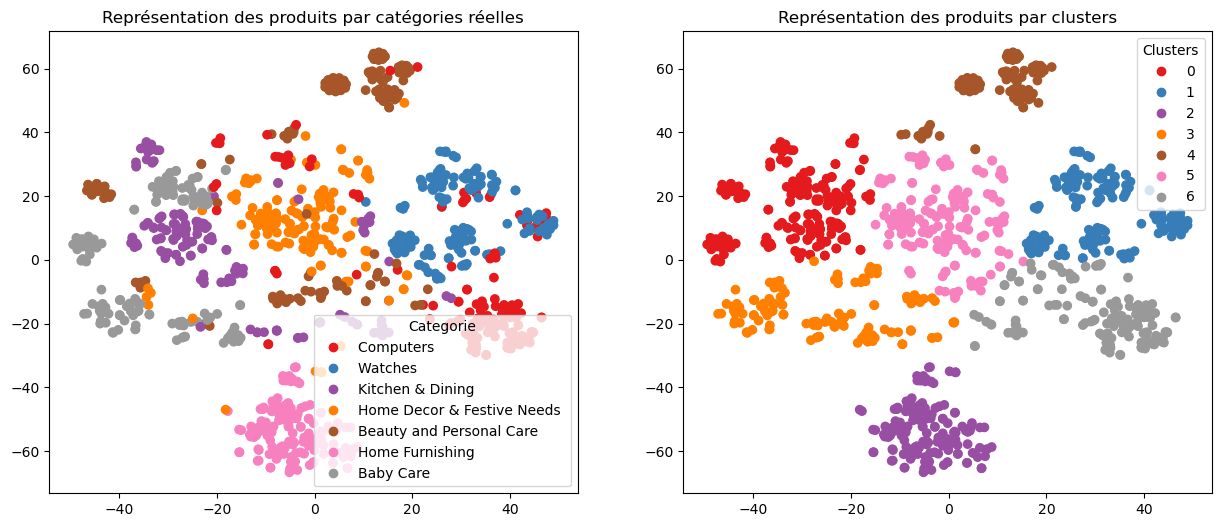

ARI :  0.5281


In [100]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### PARTIE II: FEATURES EXTRACTION IMAGES 

SIFT ORB AND SURF

https://mikhail-kennerley.medium.com/a-comparison-of-sift-surf-and-orb-on-opencv-59119b9ec3d0

## A) feature images 

### a) <b> preparation dataset

In [101]:
#!pip install opencv_python

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import cv2

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [103]:
l_cat # les categories

['Computers ',
 'Watches ',
 'Kitchen & Dining ',
 'Home Decor & Festive Needs ',
 'Beauty and Personal Care ',
 'Home Furnishing ',
 'Baby Care ']

path = r"C:\Users\Natacha\projet 6\Images"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

In [104]:
set(df["product_category"])

{'Baby Care ',
 'Beauty and Personal Care ',
 'Computers ',
 'Home Decor & Festive Needs ',
 'Home Furnishing ',
 'Kitchen & Dining ',
 'Watches '}

## Affichage d'exemples d'images par label

Computers 


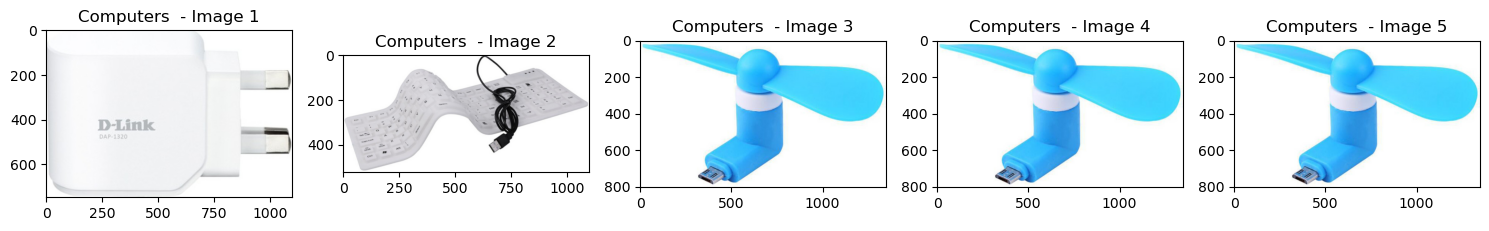

Watches 


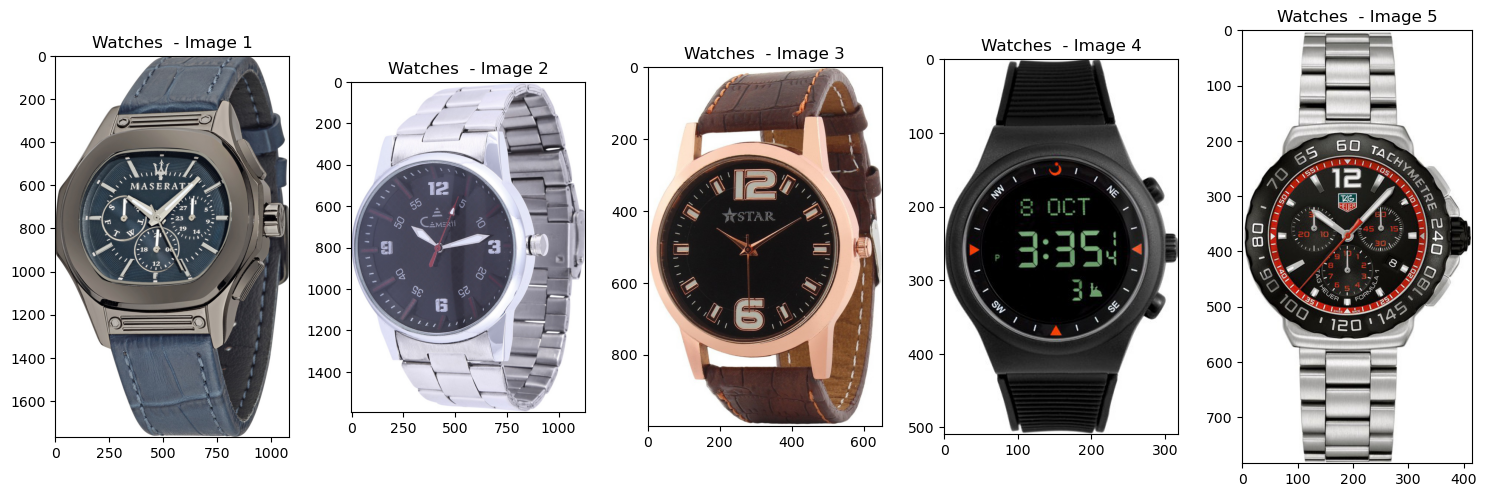

Kitchen & Dining 


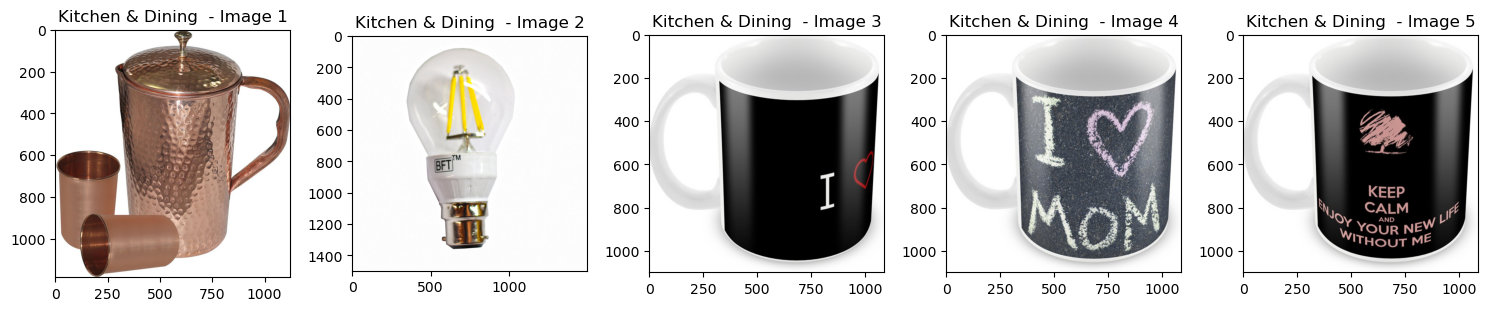

Home Decor & Festive Needs 


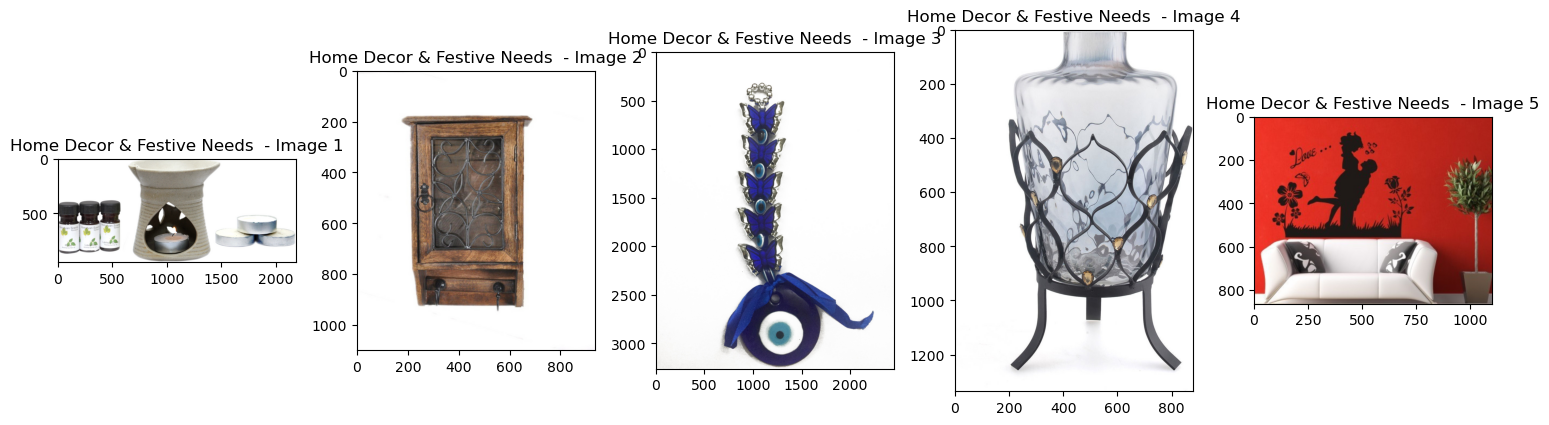

Beauty and Personal Care 


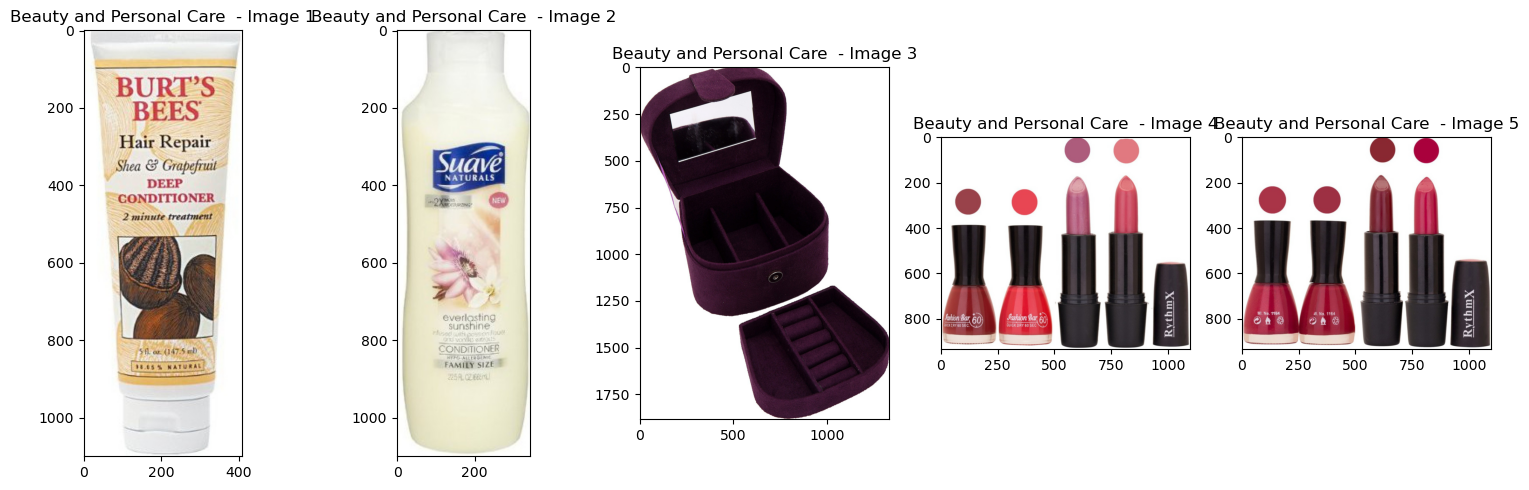

Home Furnishing 


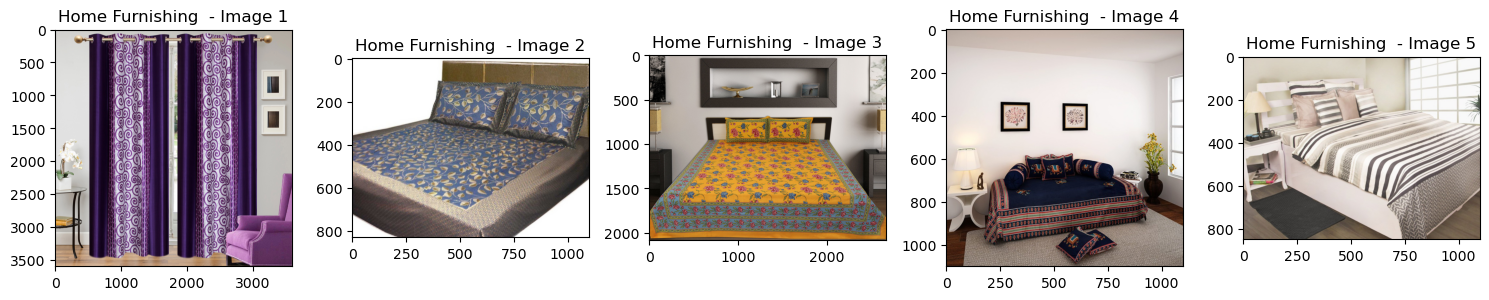

Baby Care 


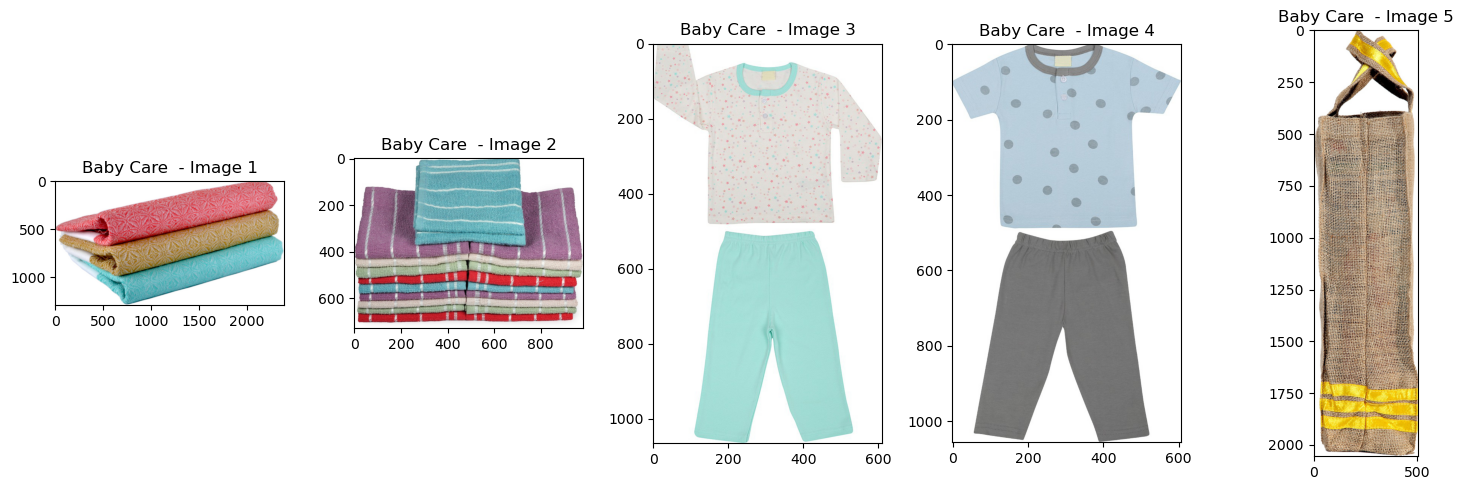

In [105]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread

path = r"/Users/saidali_bacar/Documents/projets openclassrooms/projet 6/Images"
list_photos = os.listdir(path)

def list_fct(df, name):
    return df.loc[df["product_category"] == name, "uniq_id"].tolist()

list_labels = set(df["product_category"])

for name in list_labels:
    print(name)
    uniq_ids_for_label = list_fct(df, name)

    # Create a figure for each product category
    plt.figure(figsize=(15, 5))

    for i in range(min(5, len(uniq_ids_for_label))):
        plt.subplot(1, 5, i + 1)
        uniq_id = uniq_ids_for_label[i]
        filename = os.path.join(path, f"{uniq_id}.jpg")  # Assuming images are named as uniq_id.jpg
        image = imread(filename)
        plt.imshow(image)
        plt.title(f"{name} - Image {i+1}")

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [106]:
path = r"/Users/saidali_bacar/Documents/projets openclassrooms/projet 6/Images"
df["image_path"] = df["uniq_id"].apply(lambda x: os.path.join(path, f"{x}.jpg"))

les images correspondent bien aux différentes catégories

### b) Pré-traitement des images via SIFT

### Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [107]:
#!pip install opencv_contrib_python

SIFT

In [108]:
import cv2
import os
import numpy as np

def extract_features(path, detector):
    keypoints_list = []
    descriptors_list = []

    list_photos = df["image_path"].tolist()

    for image_num in range(len(list_photos)):
        image_path = os.path.join(path, list_photos[image_num])
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors
        kp, des = detector.detectAndCompute(gray_image, None)

        # Append keypoints and descriptors to the lists if not empty
        if des is not None and des.shape[0] > 0:
            keypoints_list.append(kp)
            descriptors_list.append(des)

    return keypoints_list, descriptors_list

def keypoints_to_array(keypoints_list):
    keypoints_array = np.concatenate(keypoints_list, axis=0)
    return keypoints_array

def descriptors_to_array(descriptors_list):
    min_num_features = min(des.shape[1] for des in descriptors_list)
    descriptors_fixed_shape = [des[:, :min_num_features] for des in descriptors_list]
    descriptors_array_all = np.concatenate(descriptors_fixed_shape, axis=0)
    return descriptors_array_all, descriptors_fixed_shape

# Set the path to your images
path = r"C:\Users\Natacha\projet 6\Images"

# Extract features using SIFT
sift = cv2.SIFT_create()
sift_keypoints, sift_descriptors = extract_features(path, sift)

# Convert keypoints and descriptors to NumPy arrays
keypoints_array_sift = keypoints_to_array(sift_keypoints)
descriptors_array_all_sift, descriptors_keypoints_by_img_sift = descriptors_to_array(sift_descriptors)

# Print the shapes of keypoints and descriptors arrays
print("Shape of keypoints_array_sift:", keypoints_array_sift.shape)
print("Shape of descriptors_array_all_sift:", descriptors_array_all_sift.shape)

Shape of keypoints_array_sift: (5977614,)
Shape of descriptors_array_all_sift: (5977614, 128)


ORB

In [109]:
import cv2
import os
import numpy as np

def extract_features(path, detector):
    keypoints_list = []
    descriptors_list = []

    list_photos = df["image_path"].tolist()

    for image_num in range(len(list_photos)):
        image_path = os.path.join(path, list_photos[image_num])
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect keypoints and compute descriptors
        kp, des = detector.detectAndCompute(gray_image, None)

        # Append keypoints and descriptors to the lists if not empty
        if des is not None and des.shape[0] > 0:
            keypoints_list.append(kp)
            descriptors_list.append(des)

    return keypoints_list, descriptors_list

def keypoints_to_array(keypoints_list):
    keypoints_array = np.concatenate(keypoints_list, axis=0)
    return keypoints_array

def descriptors_to_array(descriptors_list):
    min_num_features = min(des.shape[1] for des in descriptors_list)
    descriptors_fixed_shape = [des[:, :min_num_features] for des in descriptors_list]
    descriptors_array_all = np.concatenate(descriptors_fixed_shape, axis=0)
    return descriptors_array_all, descriptors_fixed_shape

# Set the path to your images
path = r"C:\Users\Natacha\projet 6\Images"

# Extract features using ORB
orb = cv2.ORB_create()
orb_keypoints, orb_descriptors = extract_features(path, orb)

# Convert keypoints and descriptors to NumPy arrays
keypoints_array_orb = keypoints_to_array(orb_keypoints)
descriptors_array_all_orb, descriptors_keypoints_by_img_orb = descriptors_to_array(orb_descriptors)

# Print the shapes of keypoints and descriptors arrays
print("Shape of keypoints_array_orb:", keypoints_array_orb.shape)
print("Shape of descriptors_array_all_orb:", descriptors_array_all_orb.shape)

Shape of keypoints_array_orb: (503879,)
Shape of descriptors_array_all_orb: (503879, 32)


In [110]:
descriptors_array_all_orb

array([[ 40, 244,  31, ..., 208, 202, 187],
       [ 12, 189,  17, ...,   2,   7, 190],
       [ 72, 115,  26, ..., 130,  10,  27],
       ...,
       [ 30, 184, 166, ...,  79,  61, 119],
       [ 31,  26, 202, ..., 231,  57, 208],
       [219, 202, 239, ..., 245,  48, 120]], dtype=uint8)

In [111]:
descriptors_array_all_sift

array([[ 4.,  0.,  0., ...,  3.,  0., 20.],
       [ 0.,  0.,  1., ...,  0.,  0., 14.],
       [32.,  1.,  0., ..., 46.,  1.,  2.],
       ...,
       [ 4., 10.,  1., ...,  0.,  0.,  2.],
       [ 0.,  2., 33., ...,  0.,  0., 49.],
       [ 2.,  0.,  0., ...,  0.,  0.,  1.]], dtype=float32)

In [112]:
#descriptors_keypoints_by_img

## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [113]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(descriptors_array_all_sift)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans_sift = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans_sift.fit(descriptors_array_all_sift)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  2445
Création de 2445 clusters de descripteurs ...


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


temps de traitement kmeans :           468.84 secondes


In [114]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(descriptors_array_all_orb)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans_orb = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans_orb.fit(descriptors_array_all_orb)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  710
Création de 710 clusters de descripteurs ...


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


temps de traitement kmeans :             3.02 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [115]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans_sift, des, image_num):
    res = kmeans_sift.predict(des)
    hist = np.zeros(len(kmeans_sift.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(descriptors_keypoints_by_img_sift) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans_sift, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_sift = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            16.00 secondes


In [116]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans_orb, des, image_num):
    res = kmeans_orb.predict(des)
    hist = np.zeros(len(kmeans_orb.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(descriptors_keypoints_by_img_orb) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans_orb, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features_orb = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.75 secondes


### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [117]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_sift.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_sift= pca.fit_transform(im_features_sift)
print("Dimensions dataset après réduction PCA : ", feat_pca_sift.shape)

Dimensions dataset avant réduction PCA :  (1049, 2445)
Dimensions dataset après réduction PCA :  (1049, 661)


In [118]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_orb.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_orb= pca.fit_transform(im_features_orb)
print("Dimensions dataset après réduction PCA : ", feat_pca_orb.shape)

Dimensions dataset avant réduction PCA :  (1049, 710)
Dimensions dataset après réduction PCA :  (1049, 556)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [119]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_sift = tsne.fit_transform(feat_pca_sift)

df_tsne_sift = pd.DataFrame(X_tsne_sift[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_sift["class"] = df["product_category"]
print(df_tsne_sift.shape)

(1049, 3)


In [120]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_orb = tsne.fit_transform(feat_pca_orb)

df_tsne_orb = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_orb["class"] = df["product_category"]
print(df_tsne_orb.shape)

(1049, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/631929444.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


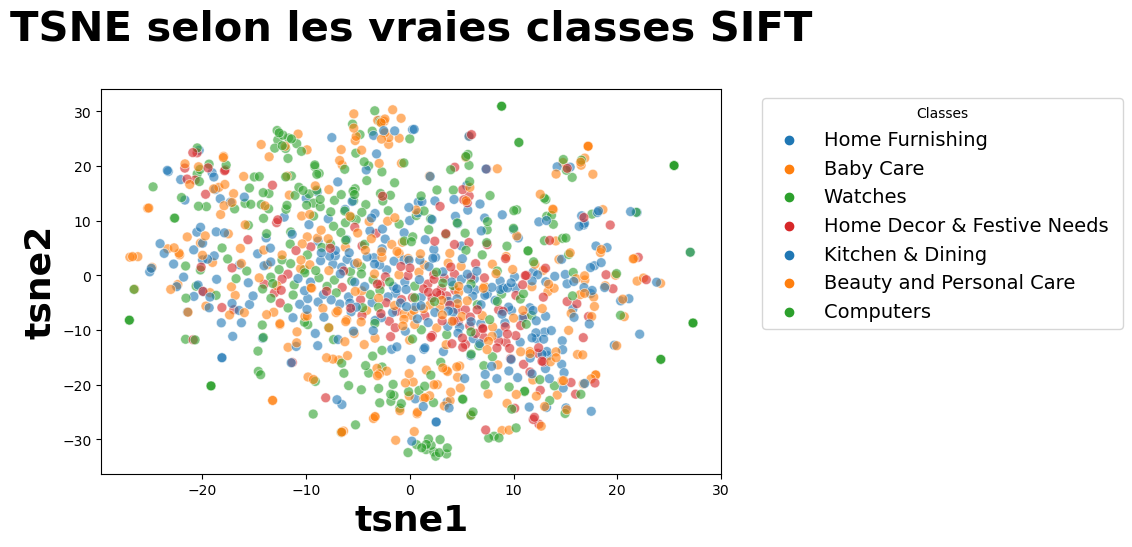

In [121]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne_sift, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes SIFT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14})
# Remove the legend from the plot
legend = plt.legend()
legend.remove()

# Place the legend outside the chart
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
plt.show()

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/79291692.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


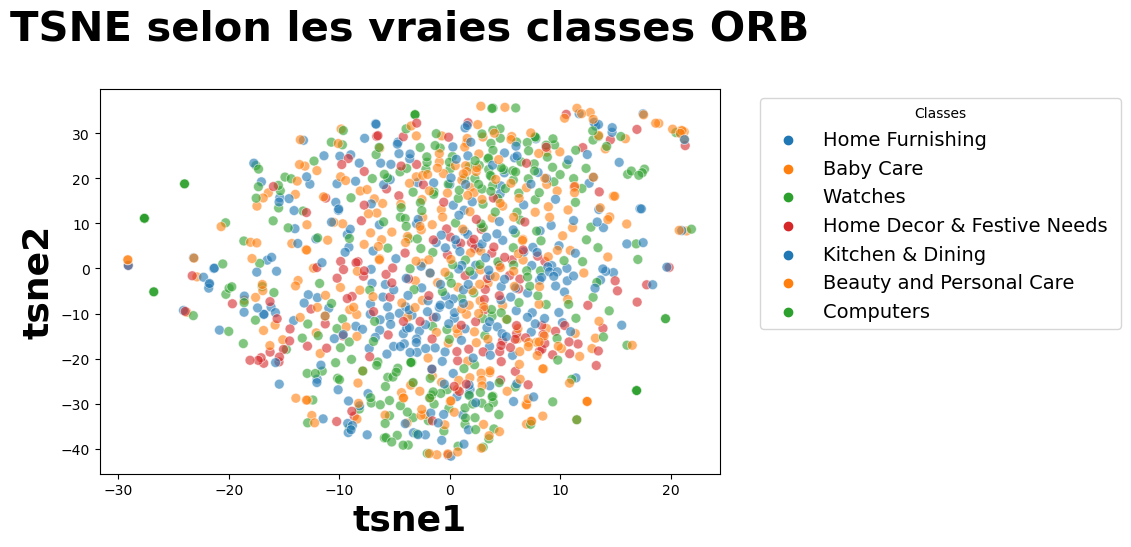

In [122]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne_orb, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes ORB', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14})
# Remove the legend from the plot
legend = plt.legend()
legend.remove()

# Place the legend outside the chart
plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [123]:
from sklearn import cluster, metrics

cls_sift = cluster.KMeans(n_clusters=7, random_state=6)
cls_sift.fit(X_tsne_sift)

df_tsne_sift["cluster"] = cls_sift.labels_
print(df_tsne_sift.shape)

(1049, 4)


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [124]:
from sklearn import cluster, metrics

cls_orb = cluster.KMeans(n_clusters=7, random_state=6)
cls_orb.fit(X_tsne_orb)

df_tsne_orb["cluster"] = cls_orb.labels_
print(df_tsne_orb.shape)


/Users/saidali_bacar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1049, 4)


In [125]:
#df_tsne["cluster"].shape

In [126]:
#df["cat_num"].iloc[1:].shape

###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/1757458835.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


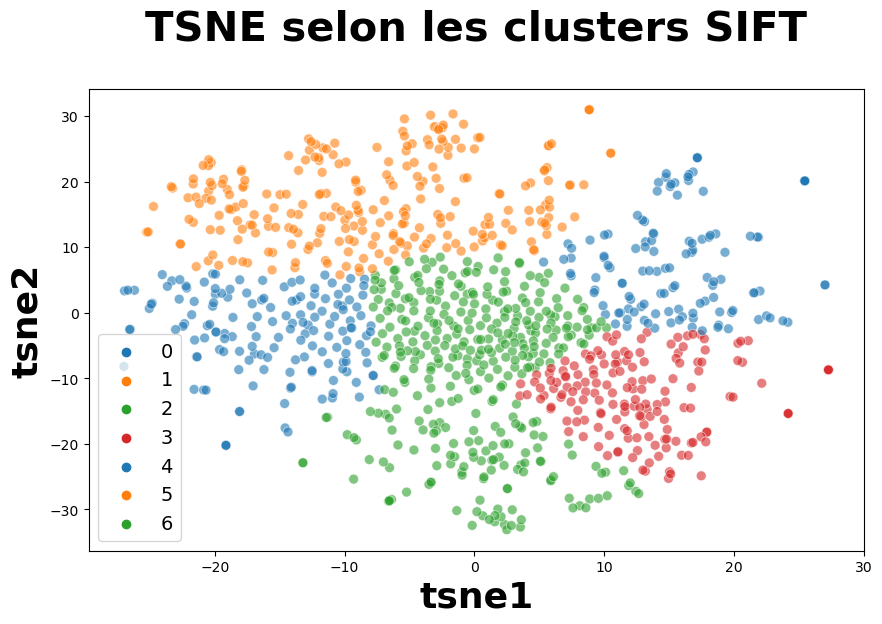

ARI :  0.04554440800898765


In [127]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne_sift,
    legend="brief")

plt.title('TSNE selon les clusters SIFT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["cat_num"]
print("ARI : ", metrics.adjusted_rand_score(labels.iloc[1:], cls_sift.labels_))

/var/folders/4t/7s7tbdy15x33d8m2g7b7syv00000gn/T/ipykernel_6700/927047246.py:2: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


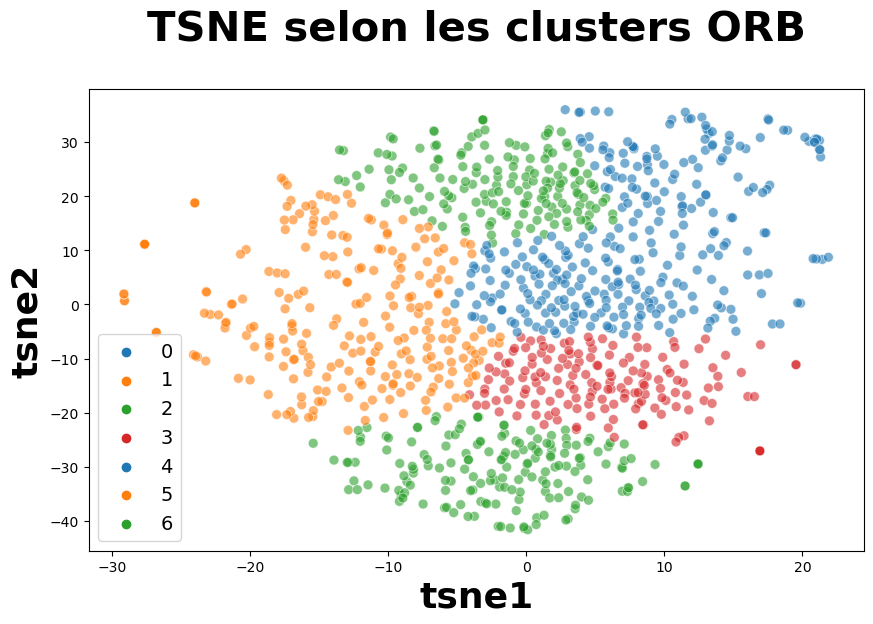

ARI :  0.026051893212724275


In [128]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne_orb,
    legend="brief")

plt.title('TSNE selon les clusters ORB', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["cat_num"]
print("ARI : ", metrics.adjusted_rand_score(labels.iloc[1:], cls_orb.labels_))